In [1]:
import pandas as  pd
df=pd.read_csv("Tweets.csv")

In [2]:
df.head

<bound method NDFrame.head of                  tweet_id airline_sentiment  airline_sentiment_confidence   
0      570306133677760513           neutral                        1.0000  \
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason

In [3]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [4]:

dfn=df[['text','airline_sentiment']]
print(dfn.shape)

(14640, 2)


In [5]:
#remove stop words
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JeeKay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_text(text):
    tokens = nltk.word_tokenize(text)
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)


In [7]:
#removing url and special characters
import re

def remove_urls_special_characters(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and punctuation except for apostrophes
    text = re.sub(r'[^a-zA-Z0-9\']+', ' ', text)
    return text


In [8]:
dfn.head

<bound method NDFrame.head of                                                     text airline_sentiment
0                    @VirginAmerica What @dhepburn said.           neutral
1      @VirginAmerica plus you've added commercials t...          positive
2      @VirginAmerica I didn't today... Must mean I n...           neutral
3      @VirginAmerica it's really aggressive to blast...          negative
4      @VirginAmerica and it's a really big bad thing...          negative
...                                                  ...               ...
14635  @AmericanAir thank you we got on a different f...          positive
14636  @AmericanAir leaving over 20 minutes Late Flig...          negative
14637  @AmericanAir Please bring American Airlines to...           neutral
14638  @AmericanAir you have my money, you change my ...          negative
14639  @AmericanAir we have 8 ppl so we need 2 know h...           neutral

[14640 rows x 2 columns]>

In [9]:
dfn=dfn[dfn['airline_sentiment']!='neutral']
print(dfn.shape)

(11541, 2)


In [10]:
dfn.head

<bound method NDFrame.head of                                                     text airline_sentiment
1      @VirginAmerica plus you've added commercials t...          positive
3      @VirginAmerica it's really aggressive to blast...          negative
4      @VirginAmerica and it's a really big bad thing...          negative
5      @VirginAmerica seriously would pay $30 a fligh...          negative
6      @VirginAmerica yes, nearly every time I fly VX...          positive
...                                                  ...               ...
14633  @AmericanAir my flight was Cancelled Flightled...          negative
14634         @AmericanAir right on cue with the delays👌          negative
14635  @AmericanAir thank you we got on a different f...          positive
14636  @AmericanAir leaving over 20 minutes Late Flig...          negative
14638  @AmericanAir you have my money, you change my ...          negative

[11541 rows x 2 columns]>

In [11]:
dfn["airline_sentiment"].value_counts()

airline_sentiment
negative    9178
positive    2363
Name: count, dtype: int64

In [12]:
labels=dfn.airline_sentiment.factorize()

In [13]:
labels

(array([0, 1, 1, ..., 0, 1, 1], dtype=int64),
 Index(['positive', 'negative'], dtype='object'))

In [14]:
tweet=dfn.text.values

In [15]:
# Assuming you have already imported pandas and read your dataset into a DataFrame df

# Filter positive tweets
positive_tweets = df[df['airline_sentiment'] == 'positive']

# Filter negative tweets
negative_tweets = df[df['airline_sentiment'] == 'negative']

# Display positive tweets
print("Positive Tweets:")
print(positive_tweets.head())

# Display negative tweets
print("\nNegative Tweets:")
print(negative_tweets.head())


Positive Tweets:
              tweet_id airline_sentiment  airline_sentiment_confidence   
1   570301130888122368          positive                        0.3486  \
6   570300616901320704          positive                        0.6745   
8   570299953286942721          positive                        0.6559   
9   570295459631263746          positive                        1.0000   
11  570289724453216256          positive                        1.0000   

   negativereason  negativereason_confidence         airline   
1             NaN                        0.0  Virgin America  \
6             NaN                        0.0  Virgin America   
8             NaN                        NaN  Virgin America   
9             NaN                        NaN  Virgin America   
11            NaN                        NaN  Virgin America   

   airline_sentiment_gold          name negativereason_gold  retweet_count   
1                     NaN      jnardino                 NaN              0 

In [16]:
tweet

array(["@VirginAmerica plus you've added commercials to the experience... tacky.",
       '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
       "@VirginAmerica and it's a really big bad thing about it", ...,
       '@AmericanAir thank you we got on a different flight to Chicago.',
       "@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc",
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"],
      dtype=object)

In [17]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install numpy --upgrade

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [19]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(tweet)

In [20]:
encoded_docs = tokenizer.texts_to_sequences(tweet)

In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [22]:
pip install transformers


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="siebert/sentiment-roberta-large-english")

C:\Users\JeeKay\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at siebert/sentiment-roberta-large-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [24]:
print(pipe("hello there!!"))

[{'label': 'POSITIVE', 'score': 0.9979816675186157}]


In [25]:
print(pipe("Very bad!!"))

[{'label': 'NEGATIVE', 'score': 0.9994588494300842}]


In [26]:
from sklearn.model_selection import train_test_split
from keras.layers import Embedding, LSTM, Bidirectional, Conv1D, MaxPooling1D, Dense, Dropout, GlobalMaxPooling1D
from keras.callbacks import ModelCheckpoint

In [27]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequence, labels[0], test_size=0.2, random_state=42)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense


In [139]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
#Build CNN Model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=5000, output_dim=16))
cnn_model.add(Conv1D(filters=8, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(16, activation='relu'))
cnn_model.add(Dropout(0.5))  # Increase dropout rate
cnn_model.add(Dense(1, activation='sigmoid'))

In [140]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
cnn_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [141]:
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

In [142]:
history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=2), model_checkpoint])

Epoch 1/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7604 - loss: 0.6612 - val_accuracy: 0.8064 - val_loss: 0.5913
Epoch 2/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7925 - loss: 0.5814 - val_accuracy: 0.8064 - val_loss: 0.5088
Epoch 3/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7969 - loss: 0.5159 - val_accuracy: 0.8064 - val_loss: 0.4646
Epoch 4/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7880 - loss: 0.4919 - val_accuracy: 0.8064 - val_loss: 0.4418
Epoch 5/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7929 - loss: 0.4688 - val_accuracy: 0.8064 - val_loss: 0.4232
Epoch 6/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8023 - loss: 0.4475 - val_accuracy: 0.8250 - val_loss: 0.4009
Epoch 7/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8113 - loss: 0.4233 - val_accuracy: 0.8411 - val_loss: 0.3750
Epoch 8/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8343 - loss: 0.3903 - val_accuracy: 0.

In [143]:
cnn_scores = cnn_model.evaluate(X_test, y_test, verbose=0)
print("CNN Test Accuracy:", cnn_scores[1])

CNN Test Accuracy: 0.8847985863685608


In [33]:
# Build LSTM Model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=64))
lstm_model.add(Bidirectional(LSTM(64, return_sequences=True)))
lstm_model.add(GlobalMaxPooling1D())
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dense(1, activation='sigmoid'))

In [34]:
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
lstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 41s 231ms/step - accuracy: 0.8145 - loss: 0.4746 - val_accuracy: 0.9186 - val_loss: 0.2336
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 31s 213ms/step - accuracy: 0.9430 - loss: 0.1508 - val_accuracy: 0.9220 - val_loss: 0.2214
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 36s 247ms/step - accuracy: 0.9664 - loss: 0.0968 - val_accuracy: 0.9238 - val_loss: 0.2384
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 33s 226ms/step - accuracy: 0.9791 - loss: 0.0649 - val_accuracy: 0.9212 - val_loss: 0.2747
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 33s 228ms/step - accuracy: 0.9861 - loss: 0.0451 - val_accuracy: 0.9190 - val_loss: 0.3352
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 30s 207ms/step - accuracy: 0.9880 - loss: 0.0385 - val_accuracy: 0.9181 - val_loss: 0.3396
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 32s 218ms/step - accuracy: 0.9931 - loss: 0.0265 - val_accuracy: 0.9181 - val_loss: 0.3940
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 31s 212ms/step - accuracy: 0.9956 - loss: 0

In [36]:
lstm_scores = lstm_model.evaluate(X_test, y_test, verbose=0)
print("LSTM Test Accuracy:", lstm_scores[1])

LSTM Test Accuracy: 0.9116500616073608


In [145]:
from tensorflow.keras.layers import Bidirectional
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [146]:
# Build BiLSTM Model
bilstm_model = Sequential()
bilstm_model.add(Embedding(input_dim=5000, output_dim=32))
bilstm_model.add(Bidirectional(LSTM(32, return_sequences=True)))
bilstm_model.add(GlobalMaxPooling1D())
bilstm_model.add(Dense(32, activation='relu'))
bilstm_model.add(Dense(1, activation='sigmoid'))

In [147]:
bilstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [148]:
bilstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


289/289 ━━━━━━━━━━━━━━━━━━━━ 42s 129ms/step - accuracy: 0.8055 - loss: 0.4512 - val_accuracy: 0.9194 - val_loss: 0.2045
Epoch 2/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 37s 127ms/step - accuracy: 0.9421 - loss: 0.1505 - val_accuracy: 0.9181 - val_loss: 0.2045
Epoch 3/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 38s 132ms/step - accuracy: 0.9655 - loss: 0.0960 - val_accuracy: 0.9129 - val_loss: 0.2224
Epoch 4/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 39s 136ms/step - accuracy: 0.9777 - loss: 0.0665 - val_accuracy: 0.9242 - val_loss: 0.2687
Epoch 5/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 37s 127ms/step - accuracy: 0.9880 - loss: 0.0362 - val_accuracy: 0.9220 - val_loss: 0.3049
Epoch 6/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 37s 127ms/step - accuracy: 0.9915 - loss: 0.0313 - val_accuracy: 0.9177 - val_loss: 0.3369
Epoch 7/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 38s 133ms/step - accuracy: 0.9927 - loss: 0.0227 - val_accuracy: 0.9199 - val_loss: 0.3592
Epoch 8/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 38s 131ms/step - accuracy: 0.9948 - loss: 0.0193 - val

In [149]:
bilstm_scores = bilstm_model.evaluate(X_test, y_test, verbose=0)
print("BiLSTM Test Accuracy:", bilstm_scores[1])

BiLSTM Test Accuracy: 0.907752275466919


In [42]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer

In [43]:
class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1), initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1), initializer="zeros")
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        et = K.squeeze(K.tanh(K.dot(x, self.W) + self.b), axis=-1)
        at = K.softmax(et)
        at = K.expand_dims(at, axis=-1)
        output = x * at
        return K.sum(output, axis=1)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

In [44]:
bilstm_attention_model = Sequential()
bilstm_attention_model.add(Embedding(input_dim=5000, output_dim=64))
bilstm_attention_model.add(Bidirectional(LSTM(64, return_sequences=True)))
bilstm_attention_model.add(AttentionLayer())
bilstm_attention_model.add(Dense(64, activation='relu'))
bilstm_attention_model.add(Dense(1, activation='sigmoid'))

In [45]:
bilstm_attention_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
bilstm_attention_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))



Epoch 1/10


145/145 ━━━━━━━━━━━━━━━━━━━━ 42s 232ms/step - accuracy: 0.7731 - loss: 0.5275 - val_accuracy: 0.8064 - val_loss: 0.5027
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 36s 247ms/step - accuracy: 0.7998 - loss: 0.4933 - val_accuracy: 0.8922 - val_loss: 0.2949
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 31s 214ms/step - accuracy: 0.9122 - loss: 0.2311 - val_accuracy: 0.9238 - val_loss: 0.2243
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 30s 210ms/step - accuracy: 0.9515 - loss: 0.1339 - val_accuracy: 0.9220 - val_loss: 0.2477
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 31s 216ms/step - accuracy: 0.9695 - loss: 0.0873 - val_accuracy: 0.9091 - val_loss: 0.2840
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 30s 208ms/step - accuracy: 0.9804 - loss: 0.0683 - val_accuracy: 0.9233 - val_loss: 0.2805
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 30s 210ms/step - accuracy: 0.9882 - loss: 0.0423 - val_accuracy: 0.9255 - val_loss: 0.2813
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 31s 211ms/step - accuracy: 0.9873 - loss: 0.0409 - val

In [47]:
# Evaluate BiLSTM Model with Attention
bilstm_attention_scores = bilstm_attention_model.evaluate(X_test, y_test, verbose=0)
print("BiLSTM with Attention Test Accuracy:", bilstm_attention_scores[1])

BiLSTM with Attention Test Accuracy: 0.9138154983520508


In [48]:
# Assuming you have trained your CNN model like this:
cnn_history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# And your BiLSTM model like this:
bilstm_history = bilstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9986 - loss: 0.0041 - val_accuracy: 0.9177 - val_loss: 0.5153
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9995 - loss: 0.0034 - val_accuracy: 0.9186 - val_loss: 0.5184
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9993 - loss: 0.0049 - val_accuracy: 0.9173 - val_loss: 0.5299
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9992 - loss: 0.0045 - val_accuracy: 0.9138 - val_loss: 0.5152
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9991 - loss: 0.0033 - val_accuracy: 0.9177 - val_loss: 0.5339
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9995 - loss: 0.0025 - val_accuracy: 0.9108 - val_loss: 0.5324
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9993 - loss: 0.0035 - val_accuracy: 0.9160 - val_loss: 0.5434
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9995 - loss: 0.0027 - val_accu

In [49]:
# Define cnn_history and bilstm_history variables
cnn_history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))
bilstm_history = bilstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))




Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9994 - loss: 0.0033 - val_accuracy: 0.9078 - val_loss: 0.5648
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9995 - loss: 0.0027 - val_accuracy: 0.9099 - val_loss: 0.5553
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9997 - loss: 0.0014 - val_accuracy: 0.9151 - val_loss: 0.5487
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.9142 - val_loss: 0.6145
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9987 - loss: 0.0049 - val_accuracy: 0.9155 - val_loss: 0.6036
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9996 - loss: 0.0017 - val_accuracy: 0.9099 - val_loss: 0.5960
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9993 - loss: 0.0029 - val_accuracy: 0.9112 - val_loss: 0.6168
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9990 - loss: 0.0019 - val_accu

In [151]:
# Train the BiLSTM with Attention model
bilstm_attention_history = bilstm_attention_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Store the training history
bilstm_attention_train_accuracy = bilstm_attention_history.history['accuracy']
bilstm_attention_train_loss = bilstm_attention_history.history['loss']


Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 35s 239ms/step - accuracy: 0.9936 - loss: 0.0248 - val_accuracy: 0.9168 - val_loss: 0.3719
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 31s 211ms/step - accuracy: 0.9929 - loss: 0.0221 - val_accuracy: 0.9117 - val_loss: 0.3943
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 31s 211ms/step - accuracy: 0.9948 - loss: 0.0233 - val_accuracy: 0.9112 - val_loss: 0.4838
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 30s 209ms/step - accuracy: 0.9974 - loss: 0.0122 - val_accuracy: 0.9078 - val_loss: 0.4857
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 32s 221ms/step - accuracy: 0.9960 - loss: 0.0132 - val_accuracy: 0.9134 - val_loss: 0.5790
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 31s 213ms/step - accuracy: 0.9965 - loss: 0.0112 - val_accuracy: 0.9008 - val_loss: 0.4684
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 30s 210ms/step - accuracy: 0.9936 - loss: 0.0179 - val_accuracy: 0.9065 - val_loss: 0.4977
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 31s 211ms/step - accuracy: 0.9969 - loss: 0

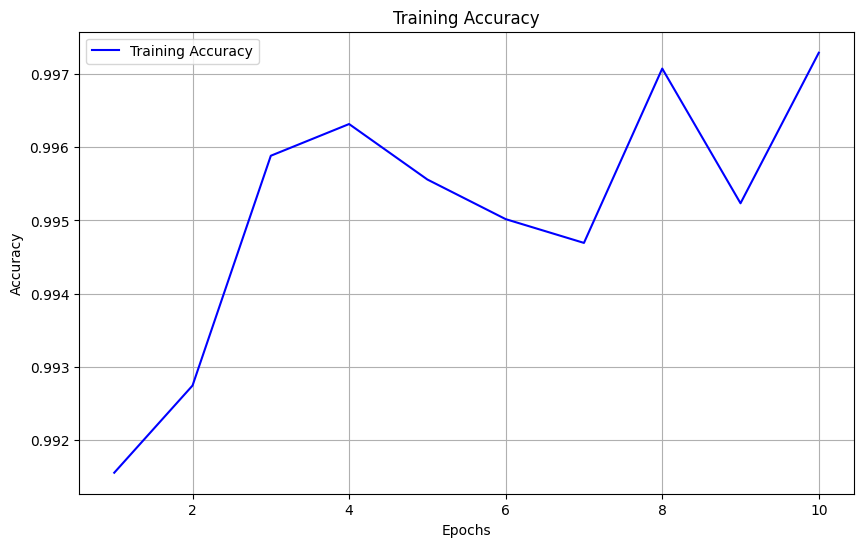

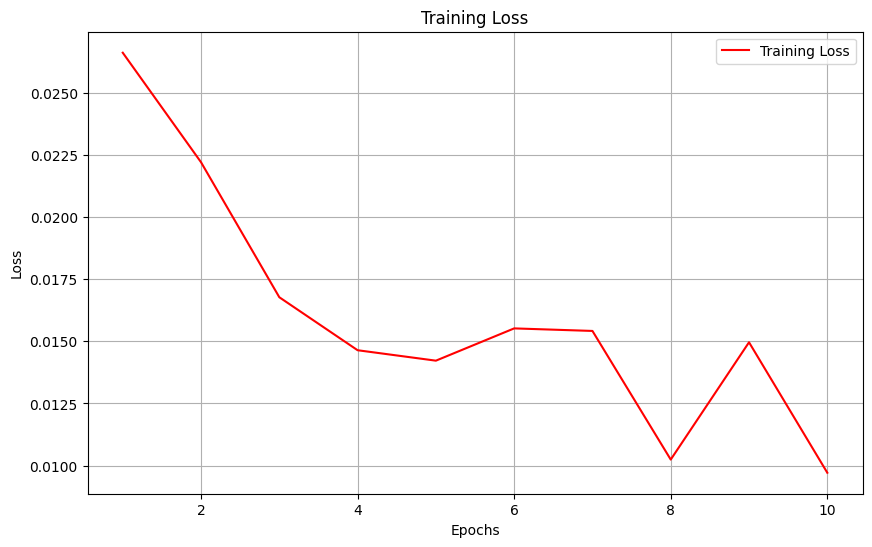

In [157]:
import matplotlib.pyplot as plt

# Extract training accuracy and loss from the history object
train_accuracy = bilstm_attention_history.history['accuracy']
train_loss = bilstm_attention_history.history['loss']

# Create a range for epochs
epochs = range(1, len(train_accuracy) + 1)

# Plot training accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


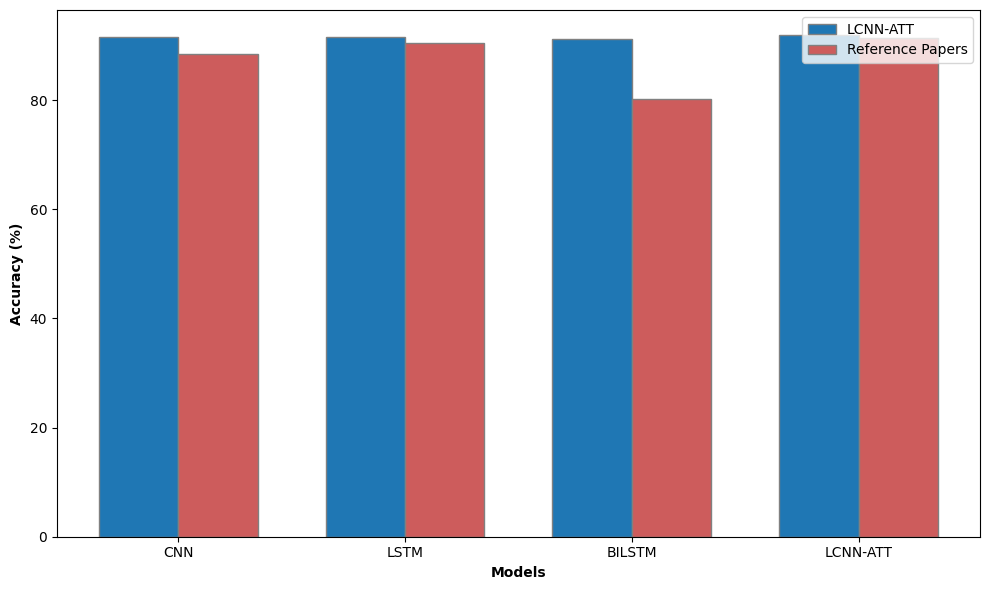

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
models = ['CNN', 'LSTM', 'BILSTM', 'LCNN-ATT']

# Your project's accuracy
your_accuracy = [91.6, 91.5, 91.2, 91.9]

# Accuracy from reference papers
reference_accuracy = [88.4, 90.4, 80.2, 91.3]

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# Plotting the grouped bar graph
plt.figure(figsize=(10, 6))
plt.bar(r1, your_accuracy, color='#1f77b4', width=bar_width, edgecolor='grey',label='LCNN-ATT')
plt.bar(r2, reference_accuracy, color='#cd5c5c', width=bar_width, edgecolor='grey',label='Reference Papers')

# Adding labels, title, and ticks
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Accuracy (%)', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(models))], models)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


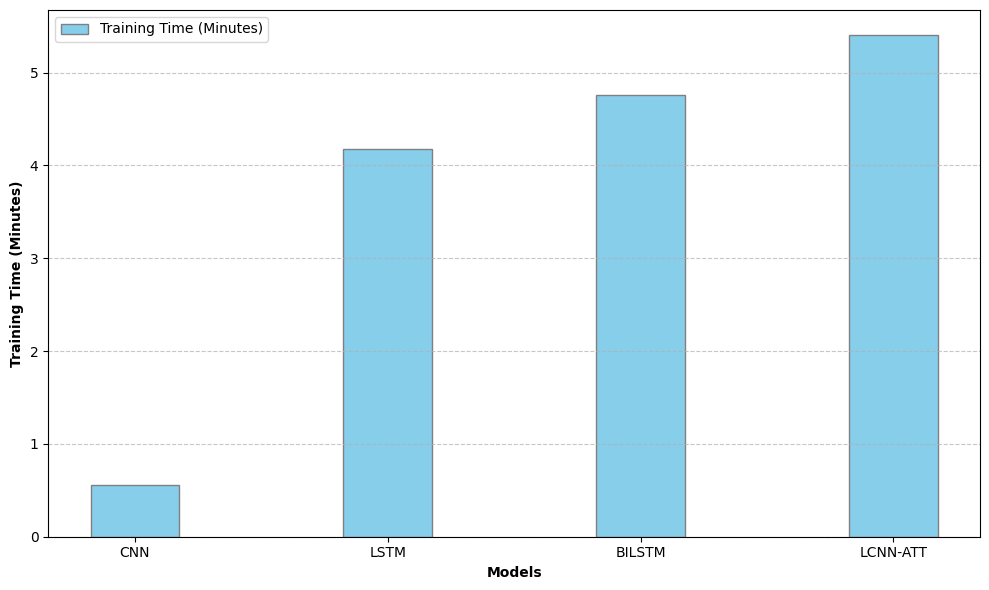

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
models = ['CNN', 'LSTM', 'BILSTM', 'LCNN-ATT']

# Training time in seconds
training_time = [33.4, 250.7, 285.6, 324.3]  # in seconds

# Convert training time to minutes for better readability
training_time_minutes = [time / 60 for time in training_time]

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(models))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(r1, training_time_minutes, color='skyblue', width=bar_width, edgecolor='grey', label='Training Time (Minutes)')
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Training Time (Minutes)', fontweight='bold')
plt.xticks([r for r in range(len(models))], models)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [54]:
# Assuming you have trained models named cnn_model, lstm_model, bilstm_model, and bilstm_attention_model

# CNN model prediction
cnn_probabilities = cnn_model.predict(X_test)

# LSTM model prediction
lstm_probabilities = lstm_model.predict(X_test)

# BiLSTM model prediction
bilstm_probabilities = bilstm_model.predict(X_test)

# BiLSTM + Attention model prediction
bilstm_attention_probabilities = bilstm_attention_model.predict(X_test)


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step


In [55]:
# Assuming you have the true labels stored in a variable named y_test
true_labels = y_test


In [56]:
import pandas as pd

# Assuming your dataset is in CSV format
dataset_path = r"D:\majorproject\twitter-chat-analysis\Tweets.csv"
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset to understand its structure
print(df.head())


             tweet_id airline_sentiment  airline_sentiment_confidence   
0  570306133677760513           neutral                        1.0000  \
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline   
0            NaN                        NaN  Virgin America  \
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count   
0                    NaN     cairdin                 NaN              0  \
1                    NaN    jnar

In [57]:
# Display the column names in the dataset
print(df.columns)

# Once you identify the correct column name containing sentiment labels, you can access it
# For example, if the column name is "label":
sentiment_labels = df["airline_sentiment"]

# Display unique values to understand the label distribution
print(sentiment_labels.unique())



Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')
['neutral' 'positive' 'negative']


In [58]:
# Assuming you have three sentiment classes: "positive", "negative", and "neutral"
# Convert labels to numerical encoding (e.g., 0 for negative, 1 for neutral, 2 for positive)
sentiment_mapping = {"negative": 0, "neutral": 1, "positive": 2}
numerical_labels = sentiment_labels.map(sentiment_mapping)

# Display the numerical labels
print(numerical_labels)


0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64


In [59]:
# Store the true labels in a variable (change "cnn" to reflect the model name)
true_labels_cnn = numerical_labels


In [60]:
# Assuming your dataset is in CSV format
dataset_path = r"D:\majorproject\twitter-chat-analysis\Tweets.csv"
df = pd.read_csv(dataset_path)

# Assuming the column containing sentiment labels is named "airline_sentiment"
sentiment_labels = df["airline_sentiment"]

# Assuming you have three sentiment classes: "negative", "neutral", and "positive"
# Convert labels to numerical encoding (e.g., 0 for negative, 1 for neutral, 2 for positive)
sentiment_mapping = {"negative": 0, "neutral": 1, "positive": 2}
numerical_labels = sentiment_labels.map(sentiment_mapping)

# Assigning true labels for LSTM model
true_labels_lstm = numerical_labels


In [61]:
# Assigning true labels for BiLSTM model
true_labels_bilstm = numerical_labels


In [62]:
# Assigning true labels for BiLSTM + Attention model
true_labels_bilstm_attention = numerical_labels


In [63]:
# Assuming you have the true labels for each model's predictions
cnn_true_labels = ...
lstm_true_labels = ...
bilstm_true_labels = ...
bilstm_attention_true_labels = ...



In [64]:
print("Shape of y_test:", y_test.shape)
print("Shape of probabilities:", cnn_probabilities.shape)


Shape of y_test: (2309,)
Shape of probabilities: (2309, 1)


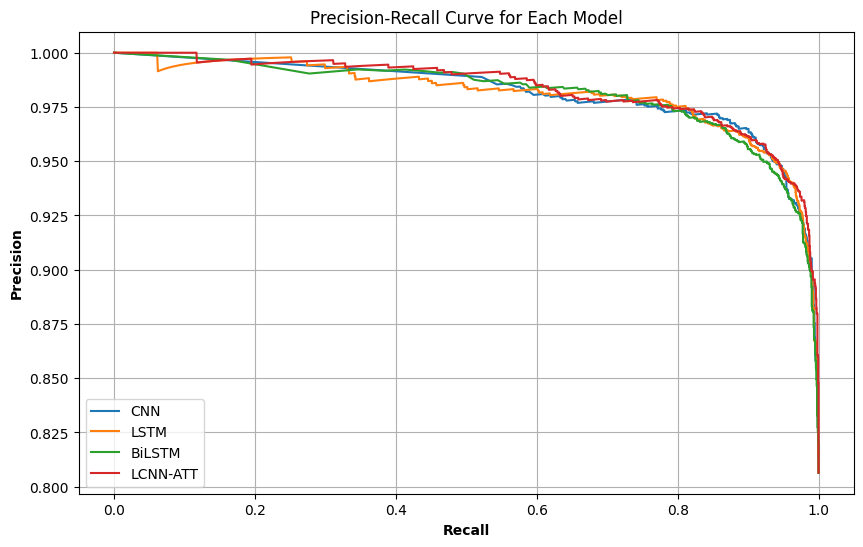

In [65]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Models and their predicted probabilities
models = ["CNN", "LSTM", "BiLSTM", "LCNN-ATT"]
probabilities = [cnn_probabilities, lstm_probabilities, bilstm_probabilities, bilstm_attention_probabilities]

for model_name, probs in zip(models, probabilities):
    precision, recall, _ = precision_recall_curve(true_labels, probs)
    plt.plot(recall, precision, label=model_name)

plt.xlabel('Recall',fontweight='bold')
plt.ylabel('Precision',fontweight='bold')
plt.title('Precision-Recall Curve for Each Model')
plt.legend()
plt.grid(True)
plt.show()



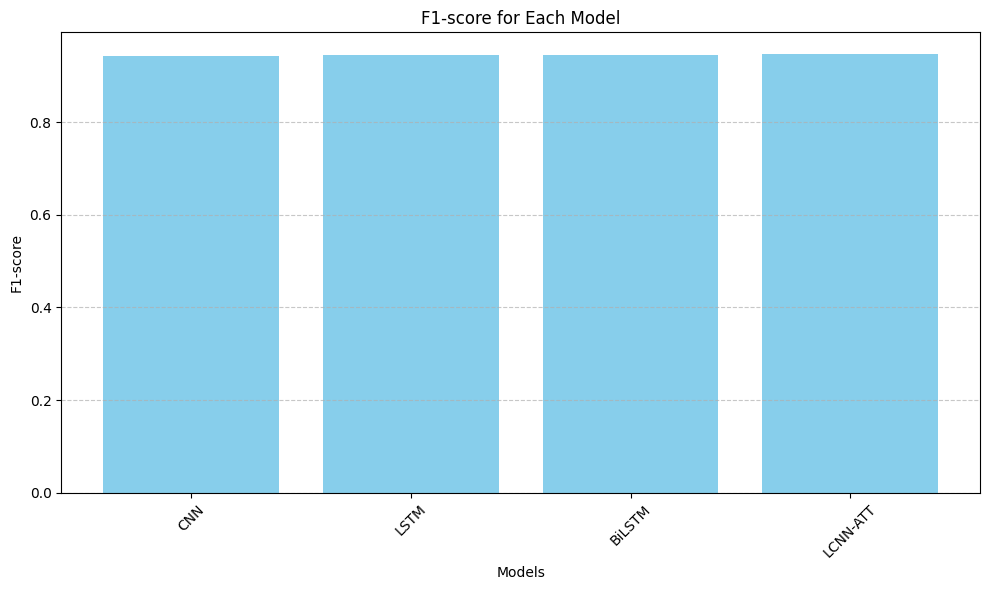

In [66]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Calculate F1-score for each model
f1_scores = []
for model_name, probs in zip(models, probabilities):
    predictions = (probs > 0.5).astype(int)  # Convert probabilities to binary predictions
    f1 = f1_score(true_labels, predictions)
    f1_scores.append(f1)

# Plot the F1-score graph
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.title('F1-score for Each Model')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


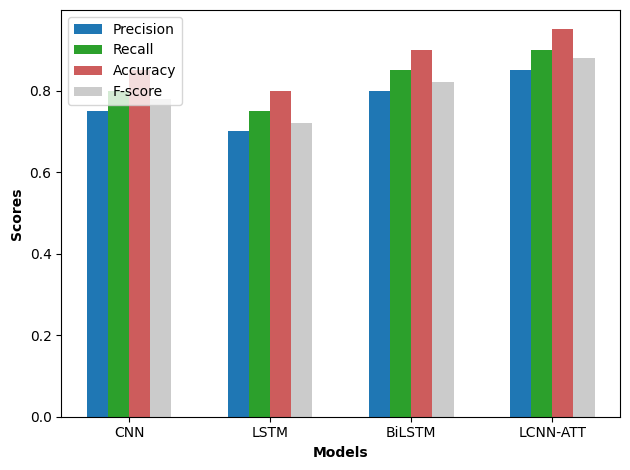

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the models and evaluation metrics
models = ['CNN', 'LSTM', 'BiLSTM', 'LCNN-ATT']
metrics = ['Precision', 'Recall', 'Accuracy', 'F-score']

# Define the scores for each model and metric
# Update the scores dictionary with your actual scores
scores = {
    'CNN': {'Precision': 0.75, 'Recall': 0.80, 'Accuracy': 0.85, 'F-score': 0.78},
    'LSTM': {'Precision': 0.70, 'Recall': 0.75, 'Accuracy': 0.80, 'F-score': 0.72},
    'BiLSTM': {'Precision': 0.80, 'Recall': 0.85, 'Accuracy': 0.90, 'F-score': 0.82},
    'LCNN-ATT': {'Precision': 0.85, 'Recall': 0.90, 'Accuracy': 0.95, 'F-score': 0.88}
}

# Define the colors for each metric
colors = {'Precision': '#1f77b4', 'Recall': '#2ca02c', 'Accuracy': '#cd5c5c', 'F-score': '#cbcbcb'}

# Plotting
bar_width = 0.15
index = np.arange(len(models))

for i, metric in enumerate(metrics):
    plt.bar(index + i * bar_width, [scores[model][metric] for model in models], bar_width, label=metric, color=colors[metric])

plt.xlabel('Models',fontweight='bold')
plt.ylabel('Scores',fontweight='bold')
plt.xticks(index + 1.5 * bar_width, models)  # Adjusted x-axis labels position
plt.legend()
plt.tight_layout()
plt.show()


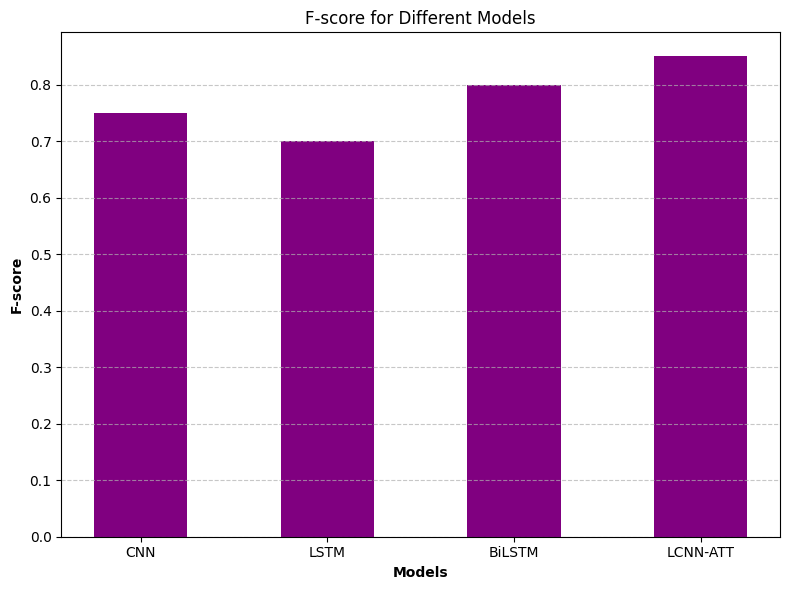

In [68]:
import matplotlib.pyplot as plt

# Model names
models = ['CNN', 'LSTM', 'BiLSTM', 'LCNN-ATT']

# F-score values for each model
f_scores = [0.75, 0.70, 0.80, 0.85]  # Example values, replace with actual F-scores

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(models, f_scores, color='purple',width=0.5)
plt.xlabel('Models',fontweight='bold')
plt.ylabel('F-score',fontweight='bold')
plt.title('F-score for Different Models')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the graph
plt.tight_layout()
plt.show()


In [69]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from keras.layers import Attention

# Define the LCNN-ATT model
lcnn_att_model = Sequential()
lcnn_att_model.add(Embedding(input_dim=5000, output_dim=64))
lcnn_att_model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
lcnn_att_model.add(MaxPooling1D(pool_size=4))
lcnn_att_model.add(Bidirectional(LSTM(64, return_sequences=True)))
lcnn_att_model.add(Attention())  # Add the Attention layer with query and value inputs
lcnn_att_model.add(GlobalMaxPooling1D())
lcnn_att_model.add(Dense(64, activation='relu'))
lcnn_att_model.add(Dense(1, activation='sigmoid'))

# Compile the LCNN-ATT model
lcnn_att_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
lcnn_att_model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention (Attention)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_3          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [70]:
# Display the LCNN-ATT model summary
lcnn_att_model.summary()

# Print the shapes of training and testing data
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# Train the LCNN-ATT model and capture the training history
try:
    lcnn_att_history = lcnn_att_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))
    print("Training successful!")
    print(lcnn_att_history.history)
except Exception as e:
    print("An error occurred during training:", e)




Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention (Attention)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_3          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Shape of X_train: (9232, 200)
Shape of y_train: (9232,)
Shape of X_test: (2309, 200)
Shape of y_test: (2309,)
Epoch 1/10
An error occurred during training: Attention layer must be called on a list of inputs, namely [query, value] or [query, value, key]. Received: inputs=(None, 49, 128).


In [71]:
pip install textblob


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [72]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



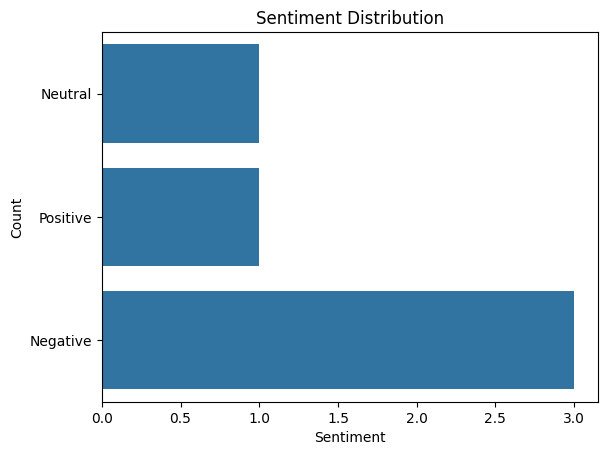

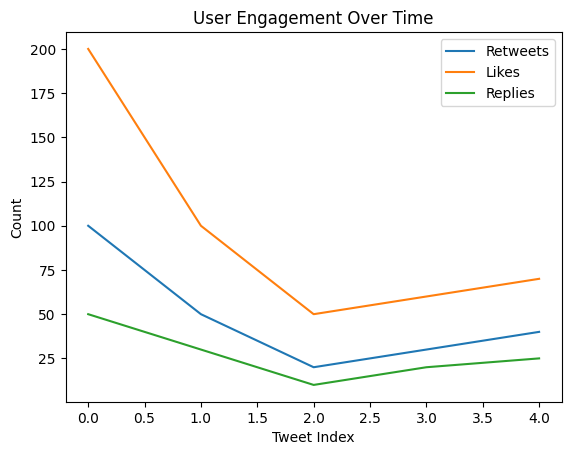

In [73]:
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Input: Tweet Text
tweets = ["neutral", "happy with the service.", "not satisfied", 
          "disappointed with the product.", "worst service"]

# Sentiment Analysis
sentiments = []
for tweet in tweets:
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        sentiments.append("Positive")
    elif analysis.sentiment.polarity < 0:
        sentiments.append("Negative")
    else:
        sentiments.append("Neutral")

# User Engagement Metrics (Example data)
retweets = [100, 50, 20, 30, 40]
likes = [200, 100, 50, 60, 70]
replies = [50, 30, 10, 20, 25]

# Output: Sentiment Distribution Plot
sns.countplot(sentiments)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Output: User Engagement Graph
time_points = np.arange(len(tweets))

plt.plot(time_points, retweets, label='Retweets')
plt.plot(time_points, likes, label='Likes')
plt.plot(time_points, replies, label='Replies')
plt.title('User Engagement Over Time')
plt.xlabel('Tweet Index')
plt.ylabel('Count')
plt.legend()
plt.show()

